In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

Dataset:


,Experience_Years,Performance_Rating,Promoted
0,2,3,No
1,4,4,Yes
2,5,5,Yes
3,3,3,No
4,6,4,Yes
5,5,4,None


Promotion prediction: Yes


C:\Users\salma\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


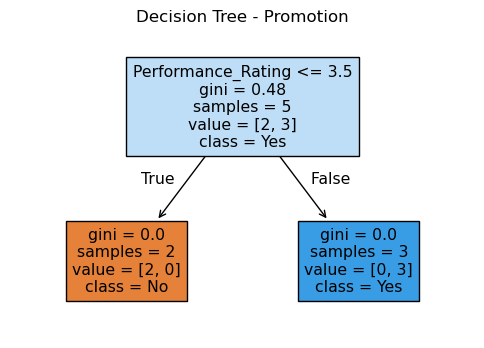

In [4]:
# employee_promotion.csv
data_promo = {
    "Experience_Years":[2,4,5,3,6,5],
    "Performance_Rating":[3,4,5,3,4,4],
    "Promoted":["No","Yes","Yes","No","Yes",None]
}
df_promo = pd.DataFrame(data_promo)
print("Dataset:")
display(df_promo)

train_df = df_promo.dropna()
X = train_df[['Experience_Years','Performance_Rating']]
y = train_df['Promoted']

tree_clf = DecisionTreeClassifier()
tree_clf.fit(X, y)

# Predict for Experience=5, Rating=4
pred_promote = tree_clf.predict([[5,4]])[0]
print("Promotion prediction:", pred_promote)

# Visualize decision tree
plt.figure(figsize=(6,4))
plot_tree(tree_clf,
          feature_names=['Experience_Years','Performance_Rating'],
          class_names=['No','Yes'],
          filled=True)
plt.title('Decision Tree - Promotion')
plt.show()


In [6]:
# Import libraries
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    'Age': [25, 30, 45, 35, 22, 40, 50],
    'Income': ['Low', 'Medium', 'High', 'Medium', 'Low', 'High', 'High'],
    'Buy': ['No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes']
}

df = pd.DataFrame(data)

# Convert categorical values
df = pd.get_dummies(df, drop_first=True)

# Features and target
X = df[['Age', 'Income_Medium', 'Income_High']]
y = df['Buy_Yes']

# Train model
model = DecisionTreeClassifier(criterion='entropy', random_state=0)
model.fit(X, y)

# Visualize
plt.figure(figsize=(10,6))
plot_tree(model, feature_names=X.columns, filled=True)
plt.show()

# Predict
print(model.predict([[28, 1, 0]]))  # 28 years, medium income


KeyError: "['Income_High'] not in index"

In [1]:
 #Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [2]:
# Sample data
data = {
    'Age': [25, 30, 45, 35, 22, 40, 50],
    'Income': ['Low', 'Medium', 'High', 'Medium', 'Low', 'High', 'High'],
    'Buy': ['No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes']
}
df = pd.DataFrame(data)
df

,Age,Income,Buy
0,25,Low,No
1,30,Medium,No
2,45,High,Yes
3,35,Medium,Yes
4,22,Low,No
5,40,High,Yes
6,50,High,Yes


In [3]:
# --- Step 1: Encode categorical features ---
encoder = OneHotEncoder(sparse_output=False)
income_encoded = encoder.fit_transform(df[['Income']])
income_encoded_df = pd.DataFrame(income_encoded, columns=encoder.get_feature_names_out(['Income']))

label_encoder = LabelEncoder()
df['Buy'] = label_encoder.fit_transform(df['Buy'])

df_encoded = pd.concat([df[['Age', 'Buy']], income_encoded_df], axis=1)
df_encoded

,Age,Buy,Income_High,Income_Low,Income_Medium
0,25,0,0.0,1.0,0.0
1,30,0,0.0,0.0,1.0
2,45,1,1.0,0.0,0.0
3,35,1,0.0,0.0,1.0
4,22,0,0.0,1.0,0.0
5,40,1,1.0,0.0,0.0
6,50,1,1.0,0.0,0.0


In [4]:
# --- Step 2: Define features and target ---
X = df_encoded.drop('Buy', axis=1)
y = df_encoded['Buy']
X, y

(   Age  Income_High  Income_Low  Income_Medium
 0   25          0.0         1.0            0.0
 1   30          0.0         0.0            1.0
 2   45          1.0         0.0            0.0
 3   35          0.0         0.0            1.0
 4   22          0.0         1.0            0.0
 5   40          1.0         0.0            0.0
 6   50          1.0         0.0            0.0,
 0    0
 1    0
 2    1
 3    1
 4    0
 5    1
 6    1
 Name: Buy, dtype: int64)

In [5]:
# --- Step 3: Train Decision Tree ---
model = DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier()

In [8]:
#prediction Example
sample = pd.DataFrame({'Age': [28], 'Income': ['Medium']})
sample_encoded = encoder.transform(sample[['Income']])
sample_encoded_df = pd.DataFrame(sample_encoded, columns=encoder.get_feature_names_out(['Income']))
sample_final = pd.concat([sample[['Age']], sample_encoded_df], axis=1)

prediction = model.predict(sample_final)
predicted_label = label_encoder.inverse_transform(prediction)
print('Prediction for Age=28, Income=Medium →', predicted_label[0])

Prediction for Age=28, Income=Medium → No


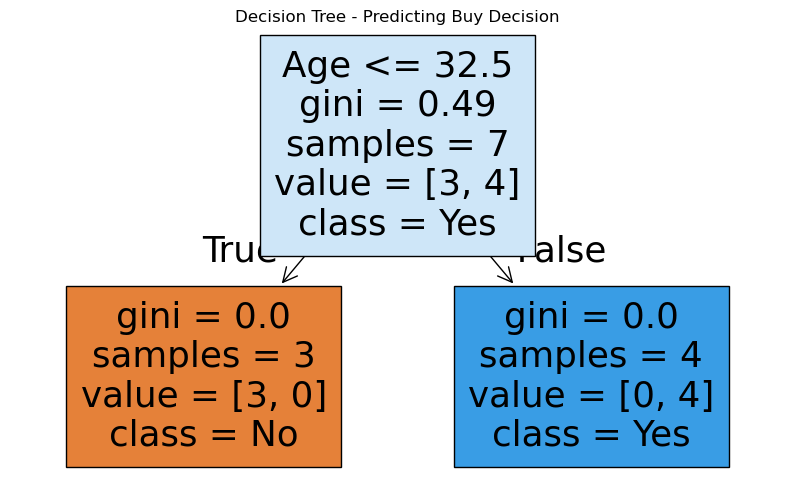

In [6]:
plt.figure(figsize=(10,6))
plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title('Decision Tree - Predicting Buy Decision')
plt.show()

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# For reproducibility
np.random.seed(0)

In [5]:
X = np.array([[1,2],[1,4],[1,0],
              [10,2],[10,4],[10,0]])
X

array([[ 1,  2],
       [ 1,  4],
       [ 1,  0],
       [10,  2],
       [10,  4],
       [10,  0]])

In [6]:
means = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_
print('Cluster labels:', labels)
print('Cluster centers:\n', centers)

NameError: name 'kmeans' is not defined

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Example swipe/badge data
X = np.array([
    [7.5, 8.0],
    [9.0, 7.0],
    [10.5, 6.5],
    [6.0, 9.0],
    [13.0, 5.5],
    [8.0, 8.5],
    [14.0, 4.5],
    [9.5, 7.0],
    [7.0, 9.0],
    [12.0, 6.0]
])

df = pd.DataFrame(X, columns=['EntryTime','Duration'])
df

,EntryTime,Duration
0,7.5,8.0
1,9.0,7.0
2,10.5,6.5
3,6.0,9.0
4,13.0,5.5
5,8.0,8.5
6,14.0,4.5
7,9.5,7.0
8,7.0,9.0
9,12.0,6.0


In [8]:
kmeans = KMeans(n_clusters=3, random_state=0)
df['Cluster'] = kmeans.fit_predict(df[['EntryTime','Duration']])
centers = kmeans.cluster_centers_
df

C:\Users\salma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,EntryTime,Duration,Cluster
0,7.5,8.0,0
1,9.0,7.0,2
2,10.5,6.5,2
3,6.0,9.0,0
4,13.0,5.5,1
5,8.0,8.5,0
6,14.0,4.5,1
7,9.5,7.0,2
8,7.0,9.0,0
9,12.0,6.0,1


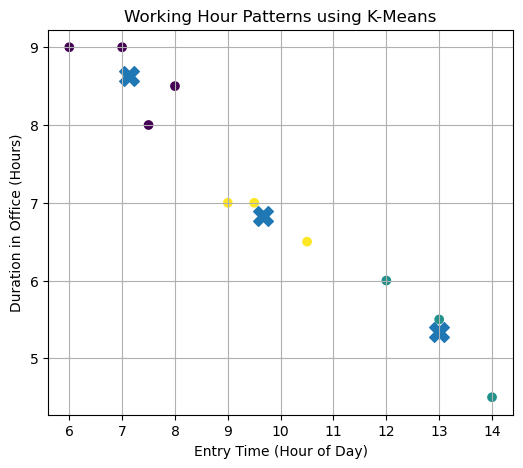

In [9]:
plt.figure(figsize=(6,5))
plt.scatter(df['EntryTime'], df['Duration'], c=df['Cluster'])
plt.scatter(centers[:,0], centers[:,1], marker='X', s=200)
plt.xlabel('Entry Time (Hour of Day)')
plt.ylabel('Duration in Office (Hours)')
plt.title('Working Hour Patterns using K-Means')
plt.grid(True)
plt.show()

# Example -2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [17]:
df = pd.read_csv("CC _GENERAL.csv")
print("Dataset loaded successfully!")
print(df.head())
print("\nShape of dataset:", df.shape)

Dataset loaded successfully!
  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1      

In [7]:
# Step 3: Data Cleaning
df = df.drop(columns=['CUST_ID'])  # Remove non-numeric ID column

# Handle missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [18]:
# Step 4: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_imputed)

print("\n Data cleaned and scaled successfully!")
print("Scaled shape:", X_scaled.shape)


 Data cleaned and scaled successfully!
Scaled shape: (8950, 18)


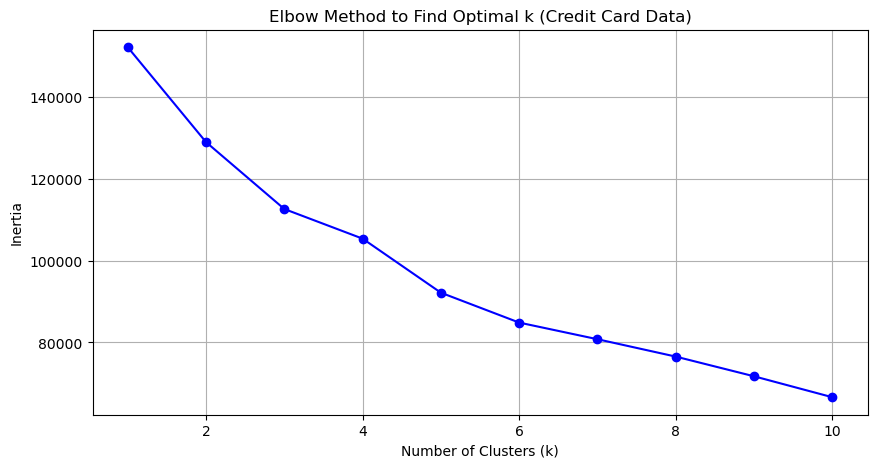

In [9]:
# Step 5: Elbow Method (manual visualization)
inertias = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(K, inertias, 'bo-')
plt.title("Elbow Method to Find Optimal k (Credit Card Data)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

In [10]:
x = np.array(list(K))
y = np.array(inertias)
x_norm = (x - x.min()) / (x.max() - x.min())
y_norm = (y - y.min()) / (y.max() - y.min())
line = np.array([x_norm, y_norm])
start, end = line[:, 0], line[:, -1]
distances = np.abs(np.cross(end - start, start - line.T)) / np.linalg.norm(end - start)
best_k = x[np.argmax(distances)]

print(f"\n Optimal number of clusters detected automatically: {best_k}")



📈 Optimal number of clusters detected automatically: 5


C:\Users\salma\AppData\Local\Temp\ipykernel_17216\3859877933.py:7: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  distances = np.abs(np.cross(end - start, start - line.T)) / np.linalg.norm(end - start)


In [12]:
kmeans = KMeans(n_clusters=int(best_k), random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df_imputed['Cluster'] = clusters
centroids = kmeans.cluster_centers_

# Step 8: Analyze Clusters
print("\n Cluster Summary (Average Values per Segment):")
print(df_imputed.groupby('Cluster').mean())



 Cluster Summary (Average Values per Segment):
             BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                                  
0        4901.241786           0.967162   551.983377        347.758605   
1        3588.990384           0.986874  7815.732886       5203.519089   
2         930.357741           0.962886  1299.705338        633.167216   
3        1524.610238           0.965721   255.629606        206.571304   
4         111.260364           0.381755   335.222822        199.440295   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                    204.327573   4982.037485             0.313364   
1                   2613.732785    661.788641             0.944730   
2                    666.735496    226.754889             0.897121   
3                     49.407619    792.368773             0.159106   
4            

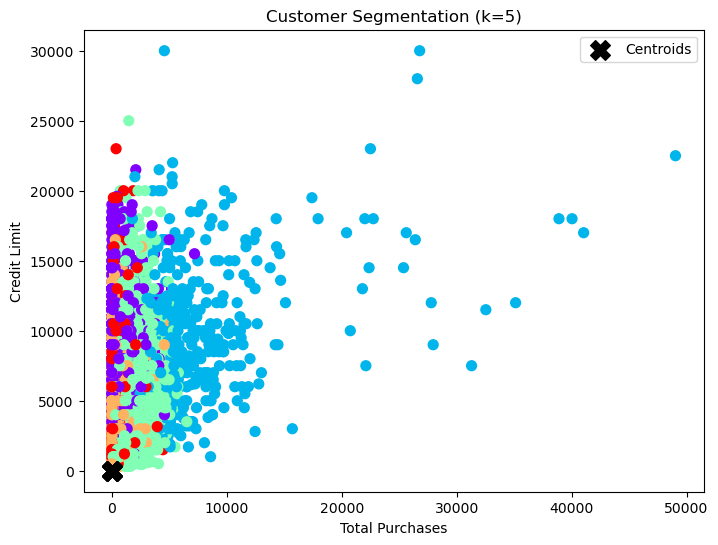

In [13]:

# Step 9: Visualize clusters using two features (e.g., PURCHASES vs CREDIT_LIMIT)
plt.figure(figsize=(8, 6))
plt.scatter(df_imputed['PURCHASES'], df_imputed['CREDIT_LIMIT'], 
            c=df_imputed['Cluster'], cmap='rainbow', s=50)
plt.scatter(centroids[:, df.columns.get_loc('PURCHASES')],
            centroids[:, df.columns.get_loc('CREDIT_LIMIT')],
            s=200, c='black', marker='X', label='Centroids')
plt.title(f"Customer Segmentation (k={int(best_k)})")
plt.xlabel("Total Purchases")
plt.ylabel("Credit Limit")
plt.legend()
plt.show()

In [15]:
new_customer = {
    'BALANCE': 2500,
    'BALANCE_FREQUENCY': 0.9,
    'PURCHASES': 1500,
    'ONEOFF_PURCHASES': 500,
    'INSTALLMENTS_PURCHASES': 1000,
    'CASH_ADVANCE': 200,
    'PURCHASES_FREQUENCY': 0.6,
    'ONEOFF_PURCHASES_FREQUENCY': 0.2,
    'PURCHASES_INSTALLMENTS_FREQUENCY': 0.5,
    'CASH_ADVANCE_FREQUENCY': 0.1,
    'CASH_ADVANCE_TRX': 2,
    'PURCHASES_TRX': 30,
    'CREDIT_LIMIT': 8000,
    'PAYMENTS': 2000,
    'MINIMUM_PAYMENTS': 500,
    'PRC_FULL_PAYMENT': 0.8,
    'TENURE': 12
}

# Convert to DataFrame
new_df = pd.DataFrame([new_customer])

# Match column order, impute (if needed), and scale
new_scaled = scaler.transform(new_df[df.columns])

# Predict cluster
predicted_cluster = kmeans.predict(new_scaled)[0]
print(f"\nThe new customer belongs to Cluster: {predicted_cluster}")


The new customer belongs to Cluster: 2


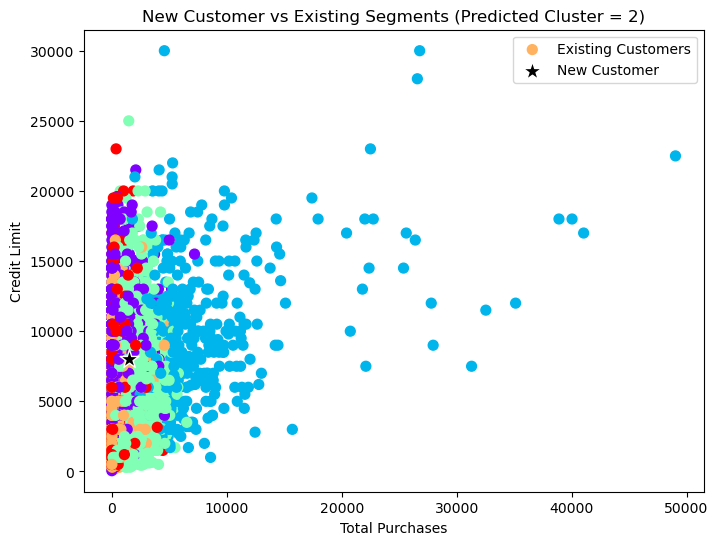

In [16]:
# =============================================================
# Step 11: Visualize new customer alongside existing ones
# =============================================================
plt.figure(figsize=(8, 6))
plt.scatter(df_imputed['PURCHASES'], df_imputed['CREDIT_LIMIT'],
            c=df_imputed['Cluster'], cmap='rainbow', s=50, label='Existing Customers')

# Plot new customer (highlight)
plt.scatter(new_df['PURCHASES'], new_df['CREDIT_LIMIT'],
            color='black', s=200, edgecolor='white', marker='*', label='New Customer')

plt.title(f"New Customer vs Existing Segments (Predicted Cluster = {predicted_cluster})")
plt.xlabel("Total Purchases")
plt.ylabel("Credit Limit")
plt.legend()
plt.show()

# Example One 
# Smart AC Energy Saver
  
 The agent decides whether to turn the AC ON or OFF.

 The environment changes temperature and gives rewards:

 +10 reward if temperature stays comfortable (20–24°C).

 -5 penalty for discomfort (too hot/cold).

-2 penalty if AC is ON (energy cost).

Goal: Learn a policy that minimizes energy cost while keeping comfort.

In [19]:
import numpy as np
import random

# States: temperature levels (in °C)
states = np.arange(16, 31)  # from 16°C to 30°C
actions = ['ON', 'OFF']

# Initialize Q-table
Q = np.zeros((len(states), len(actions)))

# Hyperparameters
alpha = 0.1     # learning rate
gamma = 0.9     # discount factor
epsilon = 0.2   # exploration rate
episodes = 300

# Reward function
def get_reward(temp, action):
    if 20 <= temp <= 24:
        reward = 10  # comfortable
    else:
        reward = -5  # uncomfortable
    if action == 'ON':
        reward -= 2  # cost of energy
    return reward

# Environment dynamics
def next_temp(temp, action):
    if action == 'ON':
        temp -= random.choice([1, 2])  # cooling
    else:
        temp += random.choice([0, 1, 2])  # heating naturally
    return int(np.clip(temp, 16, 30))

# Training loop
for ep in range(episodes):
    temp = random.choice(states)
    done = False
    for _ in range(20):  # limit steps per episode
        # Choose action (epsilon-greedy)
        if random.uniform(0, 1) < epsilon:
            action = random.choice(actions)
        else:
            action = actions[np.argmax(Q[temp - 16])]
        
        next_state = next_temp(temp, action)
        reward = get_reward(next_state, action)

        # Q-learning update
        a = actions.index(action)
        best_next = np.max(Q[next_state - 16])
        Q[temp - 16, a] += alpha * (reward + gamma * best_next - Q[temp - 16, a])

        temp = next_state

print("Training complete")

# Test learned policy
temp = 28
for step in range(10):
    action = actions[np.argmax(Q[temp - 16])]
    print(f"Step {step+1}: Temp={temp}°C -> Action={action}")
    temp = next_temp(temp, action)


Training complete
Step 1: Temp=28°C -> Action=ON
Step 2: Temp=26°C -> Action=ON
Step 3: Temp=25°C -> Action=ON
Step 4: Temp=24°C -> Action=ON
Step 5: Temp=22°C -> Action=OFF
Step 6: Temp=24°C -> Action=ON
Step 7: Temp=23°C -> Action=ON
Step 8: Temp=21°C -> Action=OFF
Step 9: Temp=23°C -> Action=ON
Step 10: Temp=21°C -> Action=OFF


In [20]:
#import numpy as np
import random
import matplotlib.pyplot as plt

# Generate synthetic stock prices (simulating market trend)
np.random.seed(42)
prices = np.cumsum(np.random.randn(100) * 2 + 0.5) + 100  # 100 time steps

# Define states (price movement)
def get_state(t):
    if t == 0:
        return 1  # neutral
    elif prices[t] > prices[t-1]:
        return 2  # uptrend
    else:
        return 0  # downtrend

# Q-Learning setup
n_states = 3       # [down, neutral, up]
n_actions = 3      # [buy, hold, sell]
Q = np.zeros((n_states, n_actions))

alpha = 0.1        # learning rate
gamma = 0.9        # discount factor
epsilon = 0.2      # exploration rate
episodes = 500

# Training
for ep in range(episodes):
    balance = 1000
    holding = False
    buy_price = 0
    
    for t in range(len(prices) - 1):
        state = get_state(t)
        
        # Choose action
        if random.uniform(0, 1) < epsilon:
            action = random.randint(0, n_actions - 1)
        else:
            action = np.argmax(Q[state])
        
        # Environment response
        next_state = get_state(t + 1)
        reward = 0
        
        if action == 0 and not holding:  # Buy
            holding = True
            buy_price = prices[t]
            reward = -1  # small penalty for buying
        
        elif action == 2 and holding:  # Sell
            profit = prices[t] - buy_price
            reward = 10 if profit > 0 else -10
            holding = False
        
        elif action == 1:  # Hold
            reward = 0
        
        # Q-value update
        Q[state, action] += alpha * (reward + gamma * np.max(Q[next_state]) - Q[state, action])

print("Training complete")

# Test policy
actions_map = {0: "Buy", 1: "Hold", 2: "Sell"}
for t in range(10):
    state = get_state(t)
    best_action = np.argmax(Q[state])
    print(f"Day {t+1}, Price: {prices[t]:.2f}, State: {state}, Action: {actions_map[best_action]}")


Training complete
Day 1, Price: 101.49, State: 1, Action: Hold
Day 2, Price: 101.72, State: 2, Action: Sell
Day 3, Price: 103.51, State: 2, Action: Sell
Day 4, Price: 107.06, State: 2, Action: Sell
Day 5, Price: 107.09, State: 2, Action: Sell
Day 6, Price: 107.12, State: 2, Action: Sell
Day 7, Price: 110.78, State: 2, Action: Sell
Day 8, Price: 112.82, State: 2, Action: Sell
Day 9, Price: 112.38, State: 0, Action: Hold
Day 10, Price: 113.96, State: 2, Action: Sell


# Example -1 Extended

# Check Data Line-by-Line using fillna() and dropna()
### Trainer: Mohd Salman

This notebook demonstrates how to check missing data line-by-line and decide whether to use **fillna()** or **dropna()** in pandas.

In [22]:
import pandas as pd

# Sample dataset
data = {
    'Name': ['Ali', 'Sara', 'John', None, 'Mary'],
    'Age': [25, None, 30, 22, None],
    'City': ['KL', 'Penang', None, 'Johor', 'KL']
}
df = pd.DataFrame(data)
print('Original DataFrame:')
print(df)

Original DataFrame:
   Name   Age    City
0   Ali  25.0      KL
1  Sara   NaN  Penang
2  John  30.0    None
3  None  22.0   Johor
4  Mary   NaN      KL


In [23]:
# Check missing values line by line
for index, row in df.iterrows():
    print(f"Row {index}: Missing = {row.isnull().any()}, Details = {row.isnull().to_dict()}")

Row 0: Missing = False, Details = {'Name': False, 'Age': False, 'City': False}
Row 1: Missing = True, Details = {'Name': False, 'Age': True, 'City': False}
Row 2: Missing = True, Details = {'Name': False, 'Age': False, 'City': True}
Row 3: Missing = True, Details = {'Name': True, 'Age': False, 'City': False}
Row 4: Missing = True, Details = {'Name': False, 'Age': True, 'City': False}


In [24]:
#  Show only rows with missing data
missing_rows = df[df.isnull().any(axis=1)]
print('Rows with missing data:')
print(missing_rows)

Rows with missing data:
   Name   Age    City
1  Sara   NaN  Penang
2  John  30.0    None
3  None  22.0   Johor
4  Mary   NaN      KL


In [25]:
# Simulate rows that would be dropped using dropna()
to_drop = df[df.isnull().any(axis=1)]
print('These rows would be dropped using dropna():')
print(to_drop)

df_cleaned = df.dropna()
print('\nAfter dropna():')
print(df_cleaned)

These rows would be dropped using dropna():
   Name   Age    City
1  Sara   NaN  Penang
2  John  30.0    None
3  None  22.0   Johor
4  Mary   NaN      KL

After dropna():
  Name   Age City
0  Ali  25.0   KL


In [26]:
# Fill missing data using fillna()
print('Before fillna():')
print(df)

df_filled = df.fillna({
    'Name': 'Unknown',
    'Age': df['Age'].mean(),
    'City': 'Not Available'
})

print('\nAfter fillna():')
print(df_filled)

Before fillna():
   Name   Age    City
0   Ali  25.0      KL
1  Sara   NaN  Penang
2  John  30.0    None
3  None  22.0   Johor
4  Mary   NaN      KL

After fillna():
      Name        Age           City
0      Ali  25.000000             KL
1     Sara  25.666667         Penang
2     John  30.000000  Not Available
3  Unknown  22.000000          Johor
4     Mary  25.666667             KL


In [27]:
# Fill missing data using fillna()
print('Before fillna():')
print(df)

df_filled = df.fillna({
    'Name': 'Unknown',
    'Age': df['Age'].mean(),
    'City': 'Not Available'
})

print('\nAfter fillna():')
print(df_filled)

Before fillna():
   Name   Age    City
0   Ali  25.0      KL
1  Sara   NaN  Penang
2  John  30.0    None
3  None  22.0   Johor
4  Mary   NaN      KL

After fillna():
      Name        Age           City
0      Ali  25.000000             KL
1     Sara  25.666667         Penang
2     John  30.000000  Not Available
3  Unknown  22.000000          Johor
4     Mary  25.666667             KL


In [28]:
# Compare each row before and after fillna()
for i in range(len(df)):
    print(f"\nRow {i} Before: {df.iloc[i].to_dict()}")
    print(f"Row {i} After : {df_filled.iloc[i].to_dict()}")


Row 0 Before: {'Name': 'Ali', 'Age': 25.0, 'City': 'KL'}
Row 0 After : {'Name': 'Ali', 'Age': 25.0, 'City': 'KL'}

Row 1 Before: {'Name': 'Sara', 'Age': nan, 'City': 'Penang'}
Row 1 After : {'Name': 'Sara', 'Age': 25.666666666666668, 'City': 'Penang'}

Row 2 Before: {'Name': 'John', 'Age': 30.0, 'City': None}
Row 2 After : {'Name': 'John', 'Age': 30.0, 'City': 'Not Available'}

Row 3 Before: {'Name': None, 'Age': 22.0, 'City': 'Johor'}
Row 3 After : {'Name': 'Unknown', 'Age': 22.0, 'City': 'Johor'}

Row 4 Before: {'Name': 'Mary', 'Age': nan, 'City': 'KL'}
Row 4 After : {'Name': 'Mary', 'Age': 25.666666666666668, 'City': 'KL'}


In [29]:
import pandas as pd

# Step 1: Load the dataset
df = pd.read_csv('Customer_Segmentation.csv')
print('Dataset loaded successfully!')
print(df.head())

Dataset loaded successfully!
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   49                  22                      12
1           2  Female   56                  41                      25
2           3    Male   66                  41                      52
3           4    Male   69                  35                      85
4           5    Male   49                  44                      53


In [30]:
# Step 2: Get basic information about dataset
print('--- Dataset Info ---')
print(df.info())

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [31]:
print('Missing values per column:')
print(df.isnull().sum())

Missing values per column:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [33]:
# Step 4: Check missing data line by line
for index, row in df.iterrows():
    if row.isnull().any():
        print(f'Row {index}: Missing Data -> {row.isnull().to_dict()}')

In [34]:
df_filled = df.fillna({
    'Gender': 'Unknown',
    'Age': df['Age'].mean(),
    'Annual Income (k$)': df['Annual Income (k$)'].mean(),
    'Spending Score (1-100)': df['Spending Score (1-100)'].mean()
})
print('Data after fillna():')
print(df_filled.head())

Data after fillna():
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   49                  22                      12
1           2  Female   56                  41                      25
2           3    Male   66                  41                      52
3           4    Male   69                  35                      85
4           5    Male   49                  44                      53


In [35]:
# Step 6: Drop missing rows (if any)
df_dropped = df.dropna()
print('Shape before dropna:', df.shape)
print('Shape after dropna:', df_dropped.shape)

Shape before dropna: (200, 5)
Shape after dropna: (200, 5)


In [ ]:
# Step 8: Compare before and after
print("\n--- Before Cleaning ---")
print(df.shape)
print("--- After fillna() ---")
print(df_filled.shape)
print("--- After dropna() ---")
print(df_dropped.shape)